# SAT Circuits Synthesis Engine - Demonstration Notebook

The *sat-circuits-engine* open-source package provides capabilities of easily generating, executing and analyzing quantum circuits for satisfiability problems according to user-defined constraints.\
The user-defined constraints for the satisfiability problem should obey a specific format (either a *low-level* format or a *high-level* format) which is explained in [constraints_format.md](constraints_format.md).

The program is capable of generating Grover's operators, generating the overall SAT circuits, executing these circuits and exporting all data. It is built in a modular fashion such that a user can use some of these features or all of them.

A class named `SATInterface` allows access to more-or-less all the program's functionality, and it is recommended to access the  features via this interface. It is possible to use `SATInterface` as an API (recommended), or to launch an interactive user interface with it (restrictive but intuitive).

Many ready-to-use examples may be found in [test_data.json](sat_circuits_engine/data/test_data.json).

In this notebook you'll find the following sections:
* [API](#API) - Instructions and demonstrations for `SATInterface`'s API.
* [Interactive user interface](#Interactive-user-interface) - Instructions for `SATInterface`'s interactive interface.
* [Appendix A](#Appendix-A) - A performance comparison to other synthesis engines for a specific benchmark satisfiability problem.
* [Appendix B](#Appendix-B) - A pre-executed usage demonstration for the interactive user interface (see the [Interactive user interface](#Interactive-user-interface) section first).

## API

### Demo 1 - Full Utilization of  the API

In this example (*example_13* from [test_data.json](sat_circuits_engine/data/test_data.json)) the constraints are defined in a *high-level* fashion, while exploiting pretty much all features:

1. Generation of the suitable Grover's operator.
2. Generation of the overall SAT circuit that solves the problem.
3. Execution of the overall SAT circuit.
4. Analysis of the execution's results.
5. Representation and data-exportation of all the above.

The exported data includes circuit diagrams, QPY serialization files for all circuit objects, QASM 2.0 export file of the transpiled operator version, results data and metadata files. It is recommended to examine the exported data after exporting it in the following cells. The exported data path will be provided by the program before exportation (the program creates a unique data directory in `sat_circuits_engine/data/generated_data/`).

In addition, comments with annotations are integrated along this example's code.

In [1]:
# (1) Run this cell for obtaining the suitable Grover's operator for the defined satisfiability problem

from sat_circuits_engine import SATInterface
    
# Defining constraints and varibales in a high-level fashion
high_level_constraints_string = (
    "(x0 != x1)," \
    "(x3 != x4)," \
    "(x1 != x3)," \
    "(x3 != x5)," \
    "(x5 != x6)," \
    "(x0 != x2)," \
    "(x1 != x6)," \
    "(x4 != x6)"
)
high_level_vars = {"x0": 1, "x1": 1, "x2": 1, "x3": 2, "x4": 1, "x5": 1, "x6": 1}

# Initialization of the interface, `save_data=True` for exporting data into a dedicated directory
demo_1 = SATInterface(
    high_level_constraints_string=high_level_constraints_string,
    high_level_vars=high_level_vars,
    name="demo_1",
    save_data=True
)

# `obtain_grover_operator()` returns a dictionary of the form: `{
#     'operator': QC_OBJ,
#     'decomposed_operator': QC_OBJ,
#     'transpiled_operator': QC_OBJ,
#     'high_level_to_bit_indexes_map': MAP_OBJ
# }`.
# Transpilation is done according to the `transpile_kwargs` arg, which by default is set to:
# {'basis_gates': ['u', 'cx'], 'optimization_level': 3}.
grover_operator_data = demo_1.obtain_grover_operator(
    transpile_kwargs={'basis_gates': ['u', 'cx'], 'optimization_level': 3}
)

demo_1.save_display_grover_operator(grover_operator_data, display=True)

Data will be saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.12.54_demo_1/'.

The system synthesizes and transpiles a Grover's operator for the given constraints. Please wait..
Done.

The operator diagram - high level blocks:



The operator diagram - decomposed:



The transpiled operator diagram saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.12.54_demo_1/grover_operator/'.
It's not presented here due to its complexity.
Please note that barriers appear in the high-level diagrams above only for convenient
visual separation between constraints.
Before transpilation all barriers are removed to avoid redundant inefficiencies.

The transpilation kwargs are: {'basis_gates': ['u', 'cx'], 'optimization_level': 3}.
Transpiled operator depth: 124.
Transpiled operator gates count: OrderedDict([('cx', 118), ('u', 102)]).
Total number of qubits: 20.

The high-level variables mapping to bit-indexes:
{'x0': [0], 'x1': [1], 'x2': [2], 'x3': [4, 3], 'x4': [5], 'x5': [6], 'x6': [7]}

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.12.54_demo_1/grover_operator/':
   Circuit diagrams for all levels.
   QPY serialization exports for all levels.
   QASM 2.0 export only for the transpiled level.


In [2]:
# (2) Run this cell for obtaining the overall SAT circuit:
# A `QuantumCircuit` object that solves the satisfiability problem, ready for execution on a backend.

from qiskit_aer import AerSimulator

# The number of iterations over Grover's iterator (= operator + diffuser) depends on the number of solutions.
# If the number of solutions is known, it is best to provide it.
# If the number of solutions is unknown, `solutions_num=-1` will initiate an classical
# iterative stochastic process that looks for an adequate number of iterations for the problem.
# Needless to mention, this process add some computational overheads.
# `solutions_num=-2` will generate a dynamic circuit to overcome the need for providing the number of solutions.
# NOTE - this is a BETA feature which is currently under development. For now it failes 
# to scale and works properly only for small circuits (~ < 15 qubits).
overall_circuit_data = demo_1.obtain_overall_sat_circuit(
    grover_operator=grover_operator_data['operator'],
    solutions_num=6,
    backend=AerSimulator()
)

demo_1.save_display_overall_circuit(overall_circuit_data, display=True)


The system builds the overall circuit..

For 6 solutions, 5 iterations needed.

The high level circuit contains 5 iterations of the following form:



The transpilation kwargs are: {'basis_gates': ['u', 'cx'], 'optimization_level': 3}.
Transpiled overall-circuit depth: 1062.
Transpiled overall-circuit gates count: OrderedDict([('u', 830), ('cx', 790), ('barrier', 45), ('measure', 8)]).
Total number of qubits: 20.

Exporting the full overall SAT circuit object..

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.12.54_demo_1/overall_circuit/':
   A concised (1 iteration) circuit diagram of the high-level overall SAT circuit.
   QPY serialization export for the full overall SAT circuit object.   QASM 2.0 export for the transpiled full overall SAT circuit object.


In [3]:
# (3) Run this cell for executing the overall SAT circuit and obtaining the results.

results_data = demo_1.run_overall_sat_circuit(
    circuit=overall_circuit_data['circuit'],
    backend=AerSimulator(),
    shots=300
)

demo_1.save_display_results(results_data, display=True)


The system is running the circuit 300 times on aer_simulator, please wait..
This process might take a while.
Done.
Circuit simulation execution time = 8.53 seconds.

The results for 300 shots are:


All counts:
[('10001001', 57), ('10010001', 56), ('01110110', 50), ('01111110', 47), ('10011001', 46), ('01100110', 41), ('00000010', 1), ('11110001', 1), ('11011001', 1)]

Distilled solutions (6 total):
{'10001001', '10010001', '01100110', '10011001', '01111110', '01110110'}

The high-level variables mapping to bit-indexes:
{'x0': [0], 'x1': [1], 'x2': [2], 'x3': [4, 3], 'x4': [5], 'x5': [6], 'x6': [7]}

High-level format solutions: 
Solution 1: x0 = 1, x1 = 0, x2 = 0, x3 = 1, x4 = 0, x5 = 0, x6 = 1
Solution 2: x0 = 1, x1 = 0, x2 = 0, x3 = 2, x4 = 0, x5 = 0, x6 = 1
Solution 3: x0 = 0, x1 = 1, x2 = 1, x3 = 0, x4 = 1, x5 = 1, x6 = 0
Solution 4: x0 = 1, x1 = 0, x2 = 0, x3 = 3, x4 = 0, x5 = 0, x6 = 1
Solution 5: x0 = 0, x1 = 1, x2 = 1, x3 = 3, x4 = 1, x5 = 1, x6 = 0
Solution 6: x0 = 0, x1 = 1, x2 = 1, x3 = 2, x4 = 1, x5 = 1, x6 = 0



In [7]:
from qiskit import QuantumCircuit

qc = QuantumCircuit.from_qasm_file("/home/ohad/work/SAT_Circuits_Engine/sat_circuits_engine/data/generated_data/D09.03.23_T10.55.16_demo_1/overall_circuit/overall_circuit.qasm")

qc.count_ops()

OrderedDict([('cx', 730),
             ('u3', 344),
             ('tdg', 100),
             ('t', 100),
             ('u1', 100),
             ('x', 70),
             ('barrier', 45),
             ('ccx', 10),
             ('measure', 8),
             ('h', 7)])

### Demo 2 - Obtaining Specific Objects via API

In this example (*example_7* from [test_data.json](sat_circuits_engine/data/test_data.json)) the constraints are defined in a *low-level* fashion, with the single purpose of obtaining Grover's operator.


The system synthesizes and transpiles a Grover's operator for the given constraints. Please wait..
Done.
The high level operator circuit diagram:


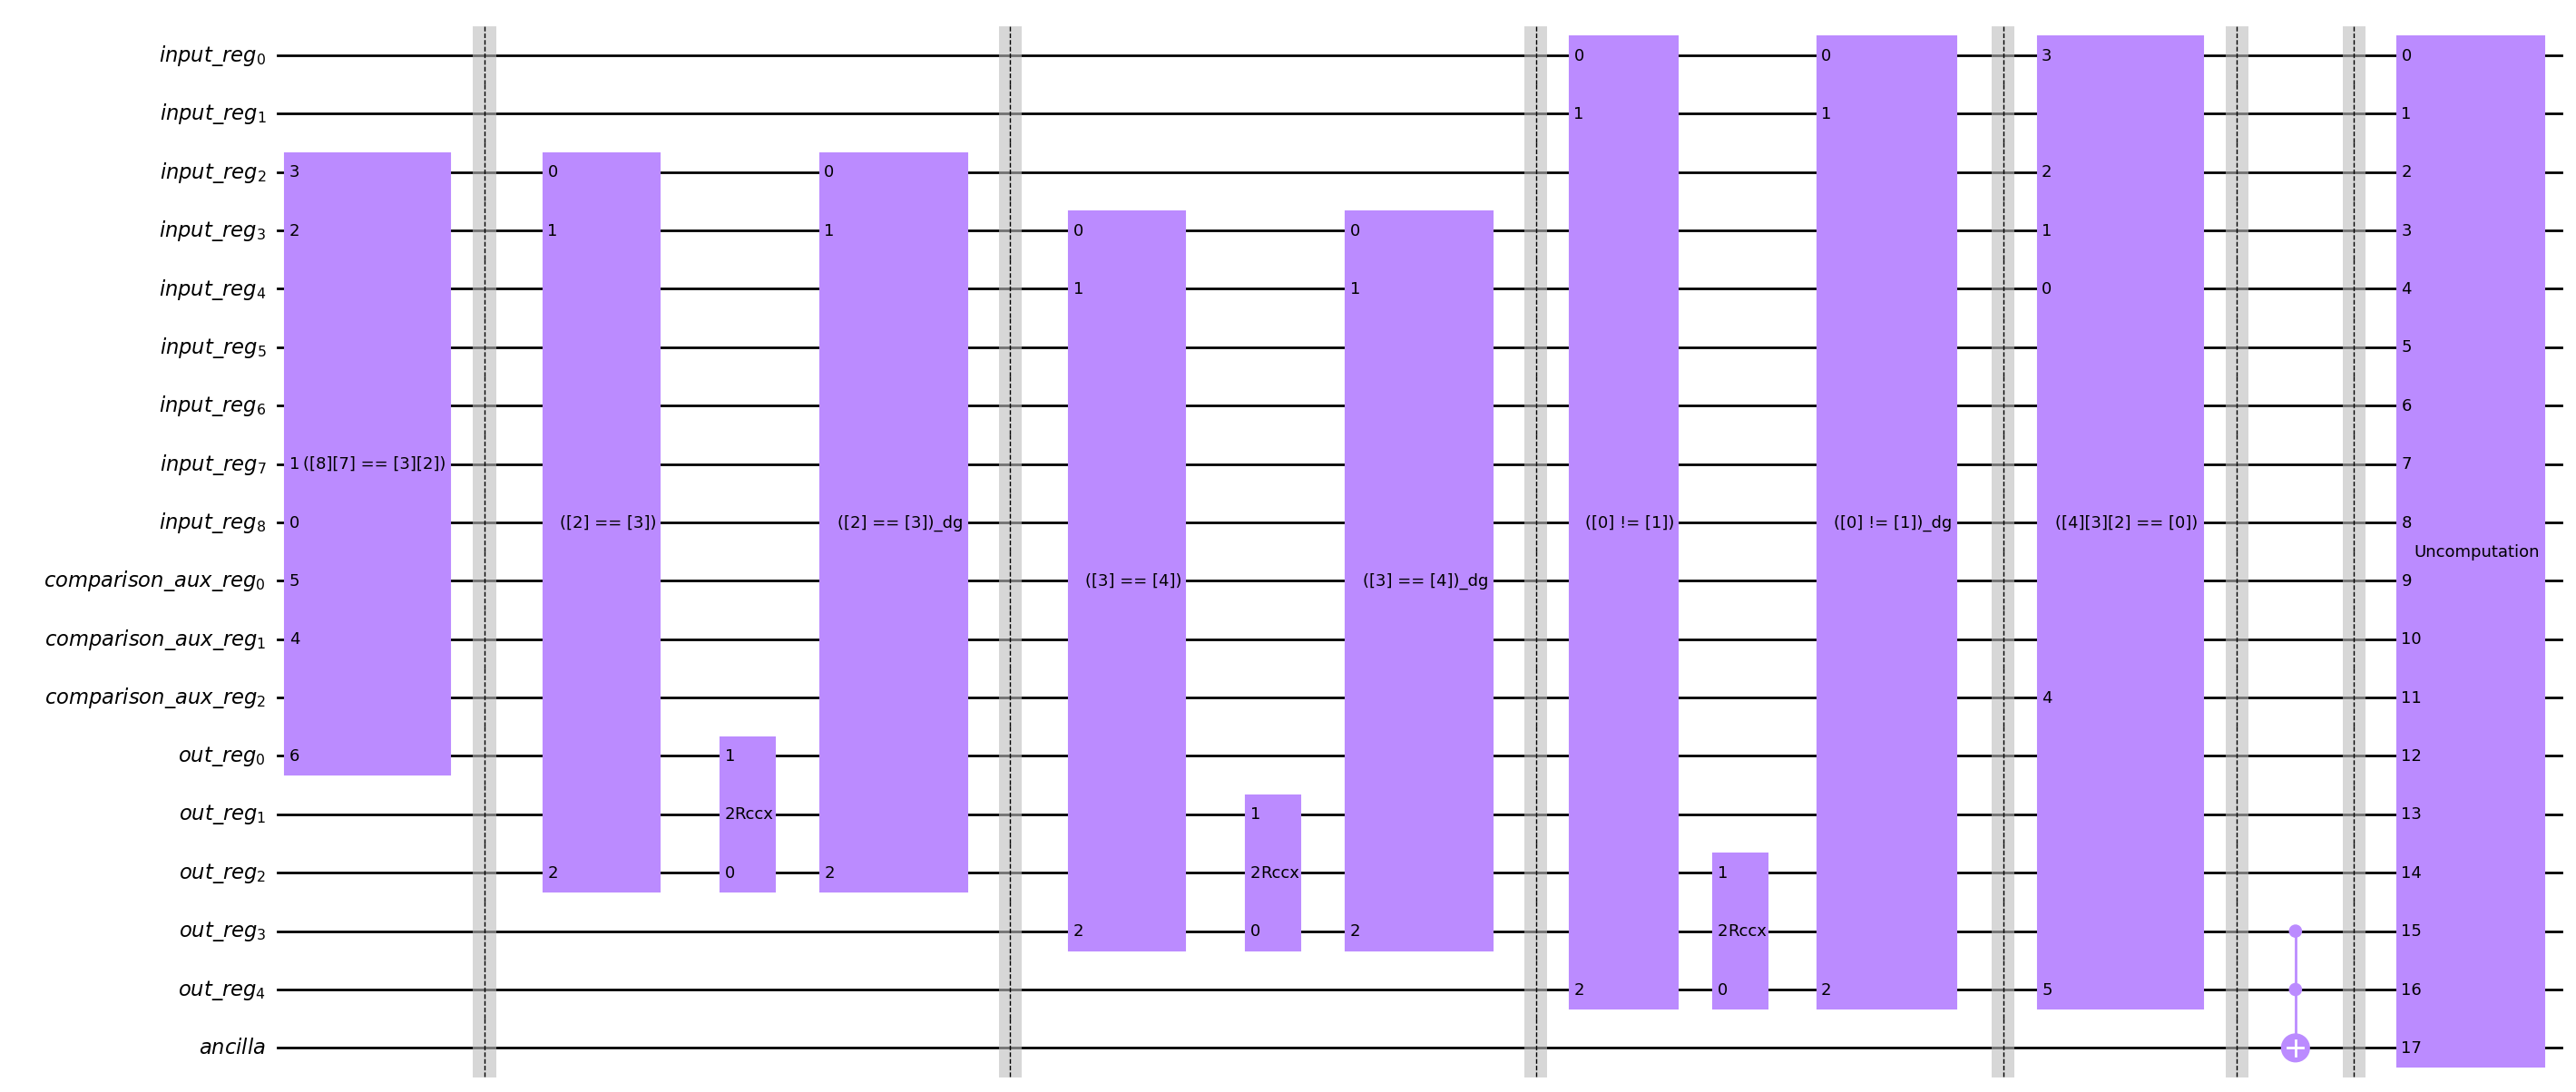

The decomposed operator circuit diagram:


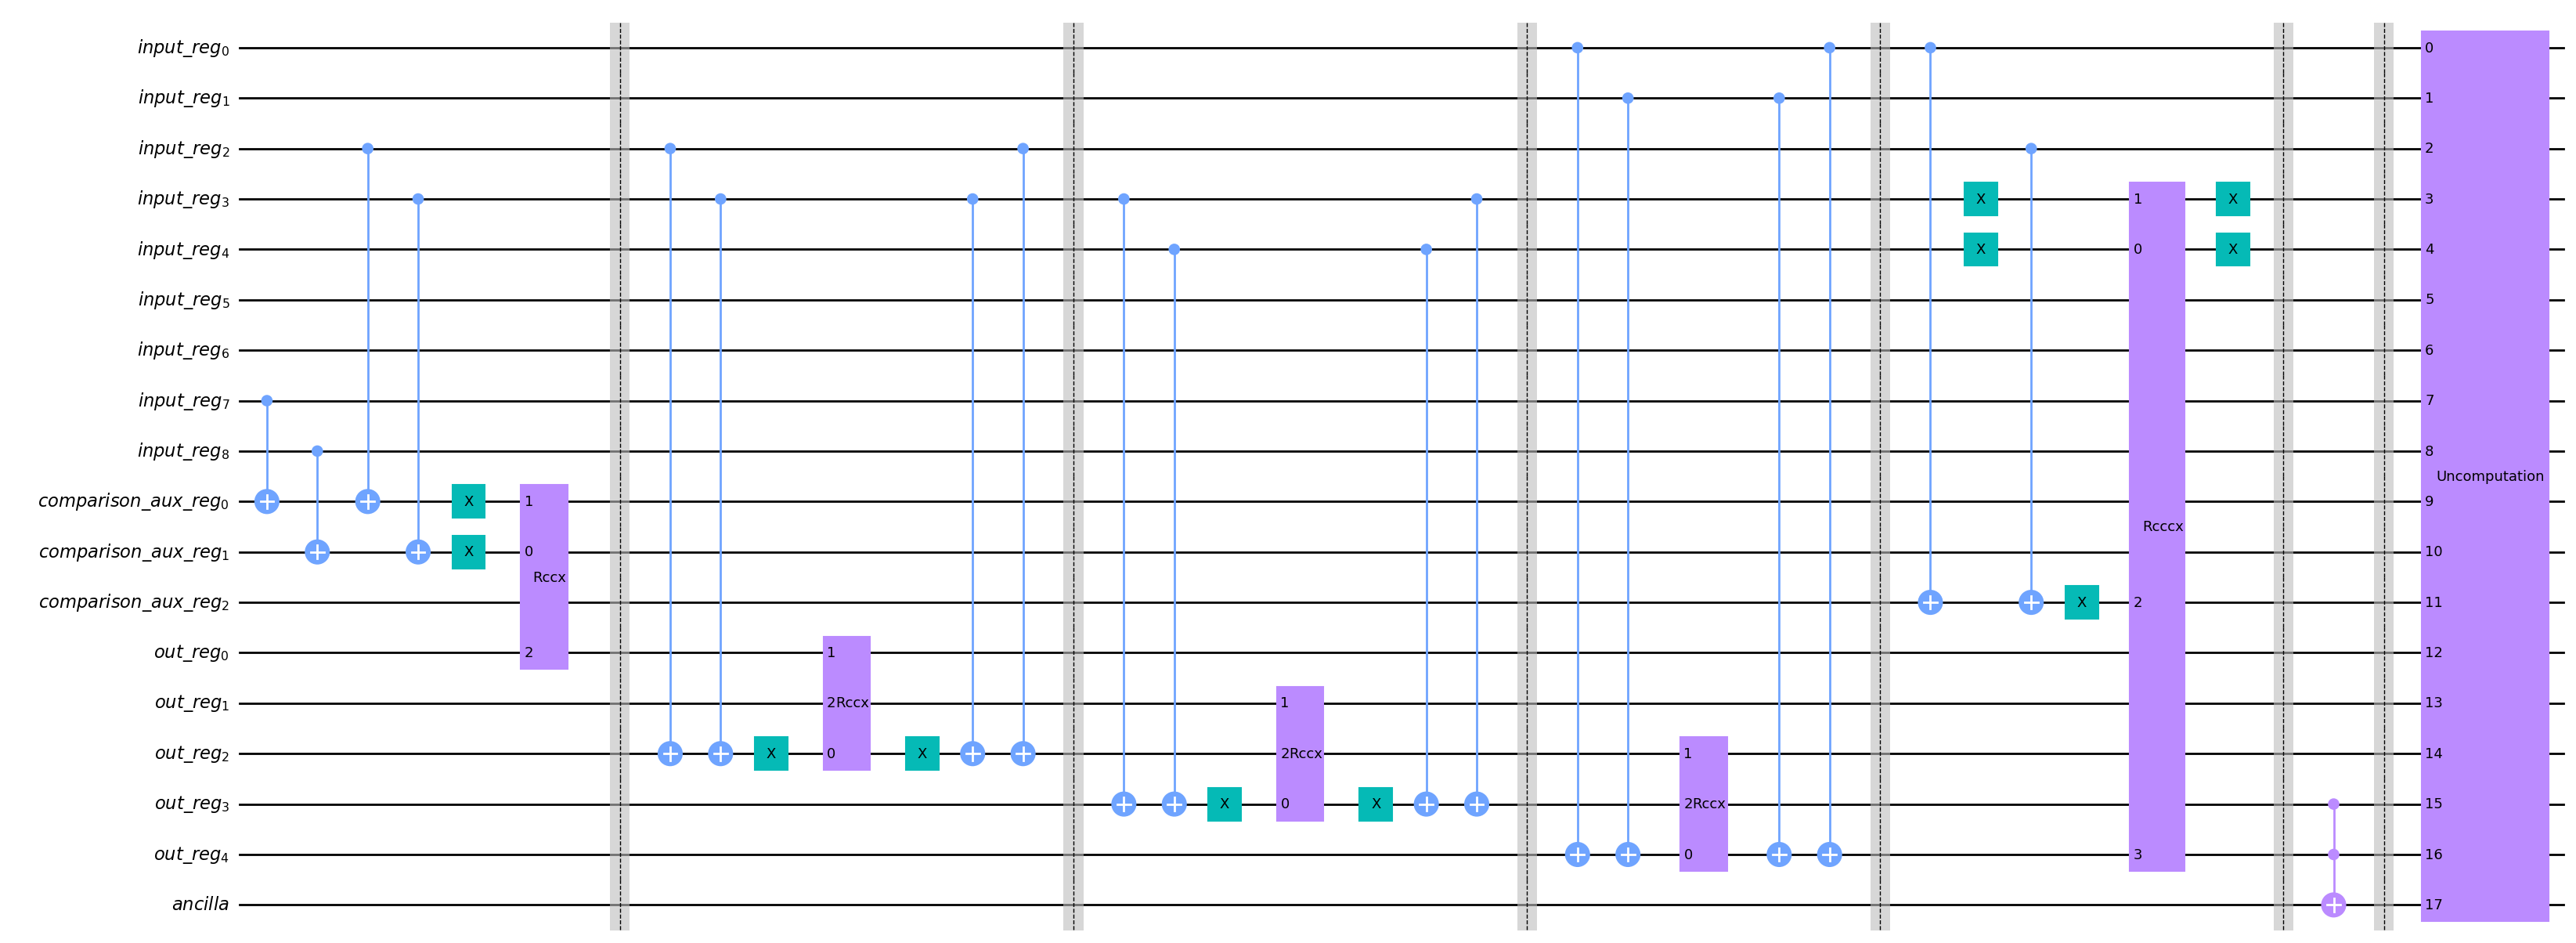

Gates count in the transpiled operator: OrderedDict([('cx', 78), ('u', 74)])


In [4]:
# (1) Run this cell to obtain Grover's operator for the defined constraints

from sat_circuits_engine import SATInterface

# Initialization of the interface, `save_data=False` = not saving and exporting data
demo_2 = SATInterface(
    constraints_string="([4][3][2] == [0]),([2] == [3]),([3] == [4]),([0] != [1]),([8][7] == [3][2])",
    num_input_qubits=9,
    name="demo_2",
    save_data=False
)


# Obtaining Grover's operator objects
grover_operator_data = demo_2.obtain_grover_operator(
    transpile_kwargs={'basis_gates': ['u', 'cx'], 'optimization_level': 3}
)
operator = grover_operator_data['operator']
decomposed_operator = grover_operator_data['decomposed_operator']
transpiled_operator = grover_operator_data['transpiled_operator']


# Displaying results
print("The high level operator circuit diagram:")
display(operator.draw('mpl', fold=-1))

print("The decomposed operator circuit diagram:")
display(decomposed_operator.draw('mpl', fold=-1))

print(f"Gates count in the transpiled operator: {transpiled_operator.count_ops()}")

## Interactive user interface

To initiate an intuitive (but somewhat restrictive) interactive interface, just execute a bare call to the API: `SATInterface()`.
Follow the instructions and enter the appropriate inputs.

The default settings for the interactive user interface are:

1. `name = "SAT"`.
2. `save_data = True`.
3. `display = True`.
4. `transpile_kwargs = {'basis_gates': ['u', 'cx'], 'optimization_level': 3}`.

See [Appendix B](#Appendix-B) for a demonstration of using the interactive interface.

Many ready-to-use examples data may be found in [test_data.json](sat_circuits_engine/data/test_data.json) - you might find it useful when playing around with the interactive interface.

For trying different satisfiability problems configurations just restart the interface by re-running the next cell.

In [ ]:
# Run this cell to initiate an interactive user interface

from sat_circuits_engine import SATInterface

SATInterface()

-----------------------

## Appendix A

This appendix provides a performance benchmark of the *sat-circuits-engine* open-source software compared to the synthesis engine offered by [*Classiq*](https://www.classiq.io/).

As explained [here](https://www.classiq.io/insights/solving-sat-problems-with-classiq), the problem to follow has been solved by *Classiq*'s synthesis engine, which generated a Grover operator with the following properties:
* Width (number of qubits): 29.
* Depth: 197.
* $CNOT$ gates count: 190.

Run the following cells and see yourself that *sat-circuits-engine* synthesizes a Grover operator for the same problem with the following properties:
* Width (number of qubits): 27.
* Depth: 211.
* $CNOT$ gates count: 194.

It is clear that at least for this benchmark problem, the two engines are comparable in performance. The engine offered by *sat-circuits-engine* provides slightly inferior performance in depth and $CNOT$ gates count, and slightly superior performance in the number of qubits (the set of width, depth and $CNOT$ gates count properties is used here as a measure for performance).

In [3]:
# (1) Run this cell for obtaining the suitable Grover's operator for the defined satisfiability problem

from sat_circuits_engine import SATInterface

# Defining constraints and varibales in a high-level fashion
high_level_constraints_string = (
    "(x0 != x1)," \
    "(x2 + 2 != x3)," \
    "(x3 != x4)," \
    "(x3 != x1)," \
    "(x5 != x6)," \
    "(x0 != x2)," \
    "(x1 != x5)," \
    "(x4 != x6)," \
    "(x3 == 2)," \
    "(x2 + x4 + x3 == 3)"
)
high_level_vars = {"x0": 1, "x1": 1, "x2": 1, "x3": 2, "x4": 1, "x5": 1, "x6": 1}

# Initialization of the interface, `save_data=True` for exporting data into a dedicated directory
benchmark_demo = SATInterface(
    high_level_constraints_string=high_level_constraints_string,
    high_level_vars=high_level_vars,
    name="benchmark_demo",
    save_data=True
)

grover_operator_data = benchmark_demo.obtain_grover_operator(
    transpile_kwargs={'basis_gates': ['u', 'cx'], 'optimization_level': 3}
)

benchmark_demo.save_display_grover_operator(grover_operator_data, display=True)

Data will be saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T08.57.38_benchmark_demo/'.

The system synthesizes and transpiles a Grover's operator for the given constraints. Please wait..
Done.

The operator diagram - high level blocks:



The operator diagram - decomposed:



The transpiled operator diagram saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T08.57.38_benchmark_demo/grover_operator/'.
It's not presented here due to its complexity.
Please note that barriers appear in the high-level diagrams above only for convenient
visual separation between constraints.
Before transpilation all barriers are removed to avoid redundant inefficiencies.

The transpilation kwargs are: {'basis_gates': ['u', 'cx'], 'optimization_level': 3}.
Transpiled operator depth: 211.
Transpiled operator gates count: OrderedDict([('u', 208), ('cx', 194)]).
Total number of qubits: 27.

The high-level variables mapping to bit-indexes:
{'x0': [0], 'x1': [1], 'x2': [2], 'x3': [4, 3], 'x4': [5], 'x5': [6], 'x6': [7]}

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T08.57.38_benchmark_demo/grover_operator/':
   Circuit diagrams for all levels.
   QPY serialization exports for all levels.
   QASM 2.0 export only for the transpiled level.


In [4]:
# (2) Run this cell for obtaining the overall SAT circuit:
# a `QuantumCircuit` object that solves the satisfiability problem, ready for execution on a backend.

from qiskit_aer import AerSimulator

overall_circuit_data = benchmark_demo.obtain_overall_sat_circuit(
    grover_operator=grover_operator_data['operator'],
    solutions_num=1,
    backend=AerSimulator()
)

benchmark_demo.save_display_overall_circuit(overall_circuit_data, display=True)


The system builds the overall circuit..

For 1 solutions, 12 iterations needed.

The high level circuit contains 12 iterations of the following form:



Exporting the full high-level overall SAT circuit object to a QPY file..

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T08.57.38_benchmark_demo/overall_circuit/':
   A concised (1 iteration) circuit diagram of the high-level overall SAT circuit.
   QPY serialization export for the full overall SAT circuit object.


In [ ]:
# (3) Run this cell for executing the overall SAT circuit and obtaining the results.
# WARNING: this specific circuit is heavy for a classical computer to simualte, it might take a while.

results_data = benchmark_demo.run_overall_sat_circuit(
    circuit=overall_circuit_data['circuit'],
    backend=AerSimulator(),
    shots=50
)

benchmark_demo.save_display_results(results_data, display=True)


The system is running the circuit 50 times on aer_simulator, please wait..
This process might take a while.


## Appendix B

A demonstration of running the interactive user interface with *example_17* from [test_data.json](sat_circuits_engine/data/test_data.json) in a *high-level* fashion:

In [3]:
from sat_circuits_engine import SATInterface

SATInterface()

Data will be saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.24.27_SAT/'.

For a low-level setting of constraints, enter '0'. For a high level setting, enter '1': 0

Please enter the number of input qubits: 4

Please enter a string of constraints: ([0] == [1]),([2] == [3])

The system synthesizes and transpiles a Grover's operator for the given constraints. Please wait..
Done.

The operator diagram - high level blocks:



The operator diagram - decomposed:



The transpiled operator diagram saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.24.27_SAT/grover_operator/'.
It's not presented here due to its complexity.
Please note that barriers appear in the high-level diagrams above only for convenient
visual separation between constraints.
Before transpilation all barriers are removed to avoid redundant inefficiencies.

The transpilation kwargs are: {'basis_gates': ['u', 'cx'], 'optimization_level': 3}.
Transpiled operator depth: 16.
Transpiled operator gates count: OrderedDict([('cx', 14), ('u', 12)]).
Total number of qubits: 7.

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.24.27_SAT/grover_operator/':
   Circuit diagrams for all levels.
   QPY serialization exports for all levels.
   QASM 2.0 export only for the transpiled level.

To stop here, enter '0'. For obtaining also the overall circuit, enter '1': 1

If the expected amount of solutions is known, please enter it (it is the easiest and optimal case


The transpilation kwargs are: {'basis_gates': ['u', 'cx'], 'optimization_level': 3}.
Transpiled overall-circuit depth: 46.
Transpiled overall-circuit gates count: OrderedDict([('u', 39), ('cx', 26), ('barrier', 5), ('measure', 4)]).
Total number of qubits: 7.

Exporting the full overall SAT circuit object..

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.24.27_SAT/overall_circuit/':
   A concised (1 iteration) circuit diagram of the high-level overall SAT circuit.
   QPY serialization export for the full overall SAT circuit object.
  QASM 2.0 export for the transpiled full overall SAT circuit object.

To stop here, enter '0'. For running the overall circuit and obtain data, enter '1': 1

Please enter the number of shots desired: 100

The system is running the circuit 100 times on aer_simulator, please wait..
This process might take a while.
Done.
Circuit simulation execution time = 0.08 seconds.

The results for 100 shots are:


All counts:
[('0000', 29), ('0011', 28), ('1100', 22), ('1111', 21)]

Distilled solutions (4 total):
{'1111', '0011', '0000', '1100'}

Done saving data into 'sat_circuits_engine/data/generated_data/D09.03.23_T12.24.27_SAT/'.


In [17]:
from qiskit import QuantumCircuit

qc = QuantumCircuit.from_qasm_file("/home/ohad/work/SAT_Circuits_Engine/sat_circuits_engine/data/generated_data/D09.03.23_T11.02.40_SAT/overall_circuit/overall_circuit.qasm")

In [18]:
s = SATInterface(4, "([0] == [1]),([2] == [3])")

Data will be saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T11.07.42_SAT/'.


In [20]:
go = s.obtain_grover_operator(transpile_kwargs={'basis_gates': ['x', 'sx', 'id', 'rz', 'cx'], 'optimization_level': 3})


The system synthesizes and transpiles a Grover's operator for the given constraints. Please wait..
Done.


In [22]:
osc = s.obtain_overall_sat_circuit(go['operator'], solutions_num=4)


The system builds the overall circuit..

For 4 solutions, 1 iterations needed.


In [26]:
s.save_display_overall_circuit(osc)


The high level circuit contains 1 iterations of the following form:



Exporting the full high-level overall SAT circuit object to a QPY file..

Saved into 'sat_circuits_engine/data/generated_data/D09.03.23_T11.07.42_SAT/overall_circuit/':
   A concised (1 iteration) circuit diagram of the high-level overall SAT circuit.
   QPY serialization export for the full overall SAT circuit object.


In [28]:
qc = QuantumCircuit.from_qasm_file("/home/ohad/work/SAT_Circuits_Engine/sat_circuits_engine/data/generated_data/D09.03.23_T11.07.42_SAT/overall_circuit/overall_circuit.qasm")

print(qc.depth())
print(qc.count_ops())

57
OrderedDict([('rz', 49), ('cx', 26), ('sx', 19), ('x', 4), ('measure', 4), ('barrier', 3)])


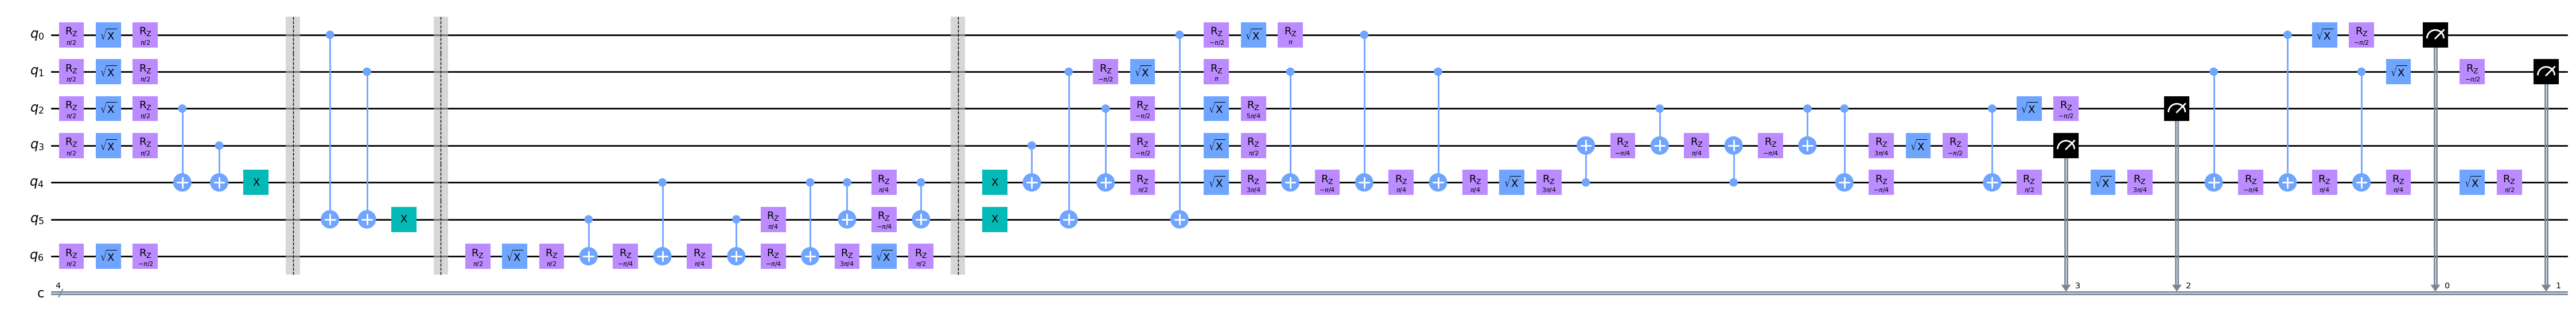

In [30]:
qc.draw('mpl', fold=-1)